In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/matches.csv")

data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data.count()

id                 756
season             756
city               749
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             752
win_by_runs        756
win_by_wickets     756
player_of_match    752
venue              756
umpire1            754
umpire2            754
umpire3            119
dtype: int64

In [ ]:
data.shape

(756, 18)

In [ ]:
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [ ]:
data = data.drop(columns=["umpire3"],axis=1)

data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


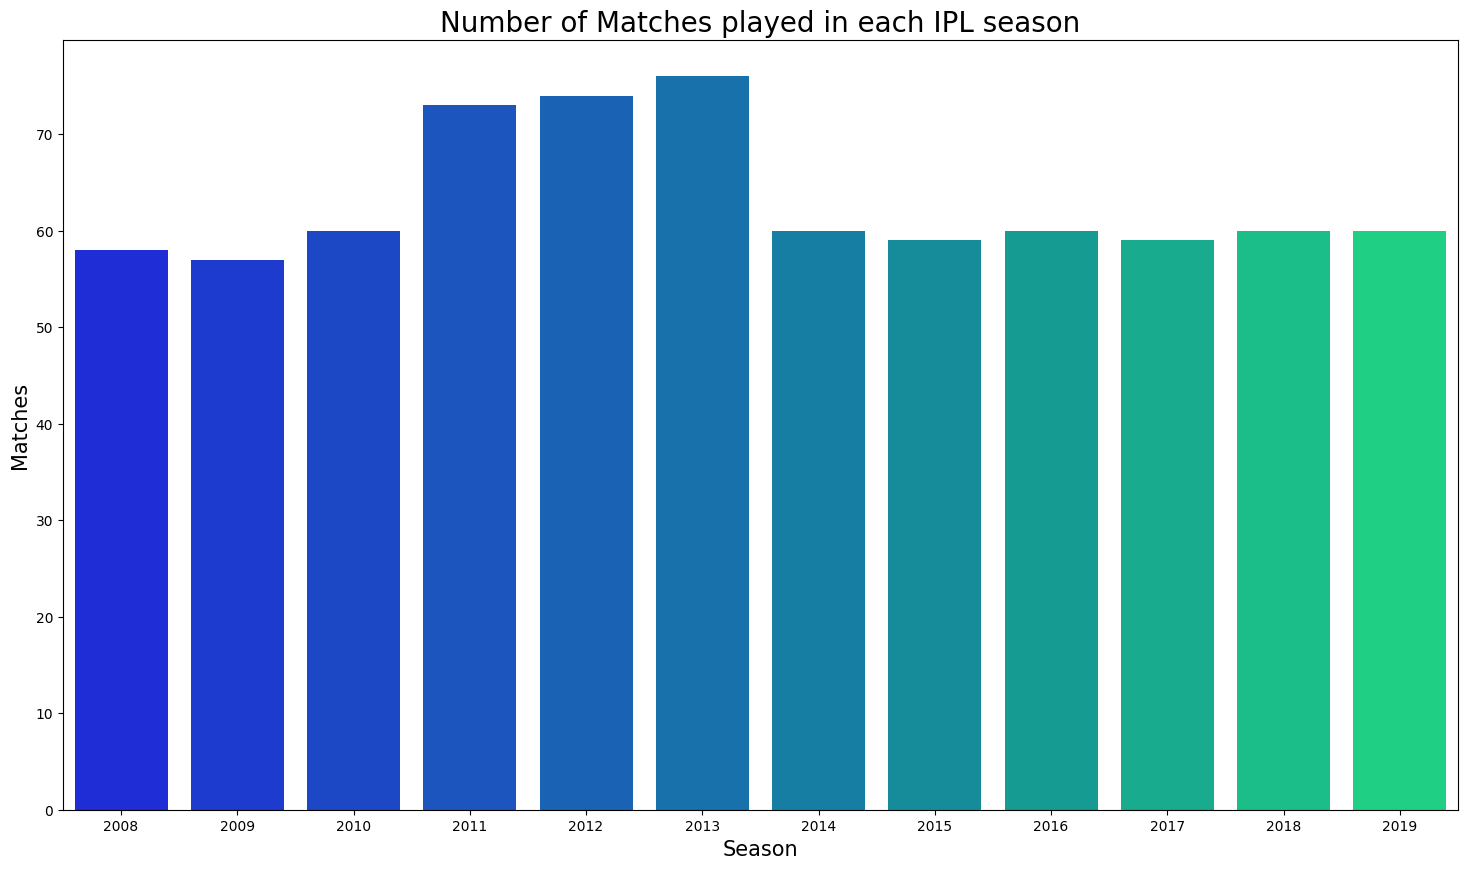

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(x = "season", data=data, palette="winter")
plt.title("Number of Matches played in each IPL season", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.show()


In [ ]:
n_team_per_year = data.groupby('season')['team1'].nunique()

In [ ]:
n_team_per_year

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
Name: team1, dtype: int64

In [ ]:
data_2011 = data[data['season'] == 2011]

# Get unique team names
unique_teams = data_2011['team1'].unique()

# Print the unique team names
print("Teams that played in 2011:")
for team in unique_teams:
    print(team)

Teams that played in 2011:
Chennai Super Kings
Deccan Chargers
Kochi Tuskers Kerala
Delhi Daredevils
Kings XI Punjab
Kolkata Knight Riders
Royal Challengers Bangalore
Rajasthan Royals
Mumbai Indians
Pune Warriors


In [ ]:
data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:


# Define a dictionary mapping old team names to current team names
team_name_mapping = {
    "Sunrisers Hyderabad": "Sunrisers Hyderabad",
    "Mumbai Indians": "Mumbai Indians",
    "Gujarat Lions": "Gujarat Titans",
    "Rising Pune Supergiant": "Pune Warriors India",
    "Royal Challengers Bangalore": "Royal Challengers Bangalore",
    "Kolkata Knight Riders": "Kolkata Knight Riders",
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings",
    "Chennai Super Kings": "Chennai Super Kings",
    "Rajasthan Royals": "Rajasthan Royals",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Kochi Tuskers Kerala": "Kerala Blasters",
    "Pune Warriors": "Pune Warriors India",
    "Rising Pune Supergiants": "Pune Warriors India",
    "Delhi Capitals": "Delhi Capitals",
}

# Update team names in the dataframe
def update_team_names(data):
    for index, row in data.iterrows():
        old_team_name = row["team1"]
        new_team_name = team_name_mapping.get(old_team_name, old_team_name)
        data.loc[index, "team1"] = new_team_name

        old_team_name = row["team2"]
        new_team_name = team_name_mapping.get(old_team_name, old_team_name)
        data.loc[index, "team2"] = new_team_name

        old_team_name = row["winner"]
        new_team_name = team_name_mapping.get(old_team_name, old_team_name)
        data.loc[index, "winner"] = new_team_name

# Read the IPL data
data = data

# Update team names
update_team_names(data)

# Save the updated data
data.to_csv("ipl_data_updated.csv", index=False)


In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune Warriors India,Rising Pune Supergiant,field,normal,0,Pune Warriors India,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Pune Warriors India,Punjab Kings,Kings XI Punjab,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
data.winner.unique()

array(['Sunrisers Hyderabad', 'Pune Warriors India',
       'Kolkata Knight Riders', 'Punjab Kings',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Titans', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kerala Blasters', nan], dtype=object)

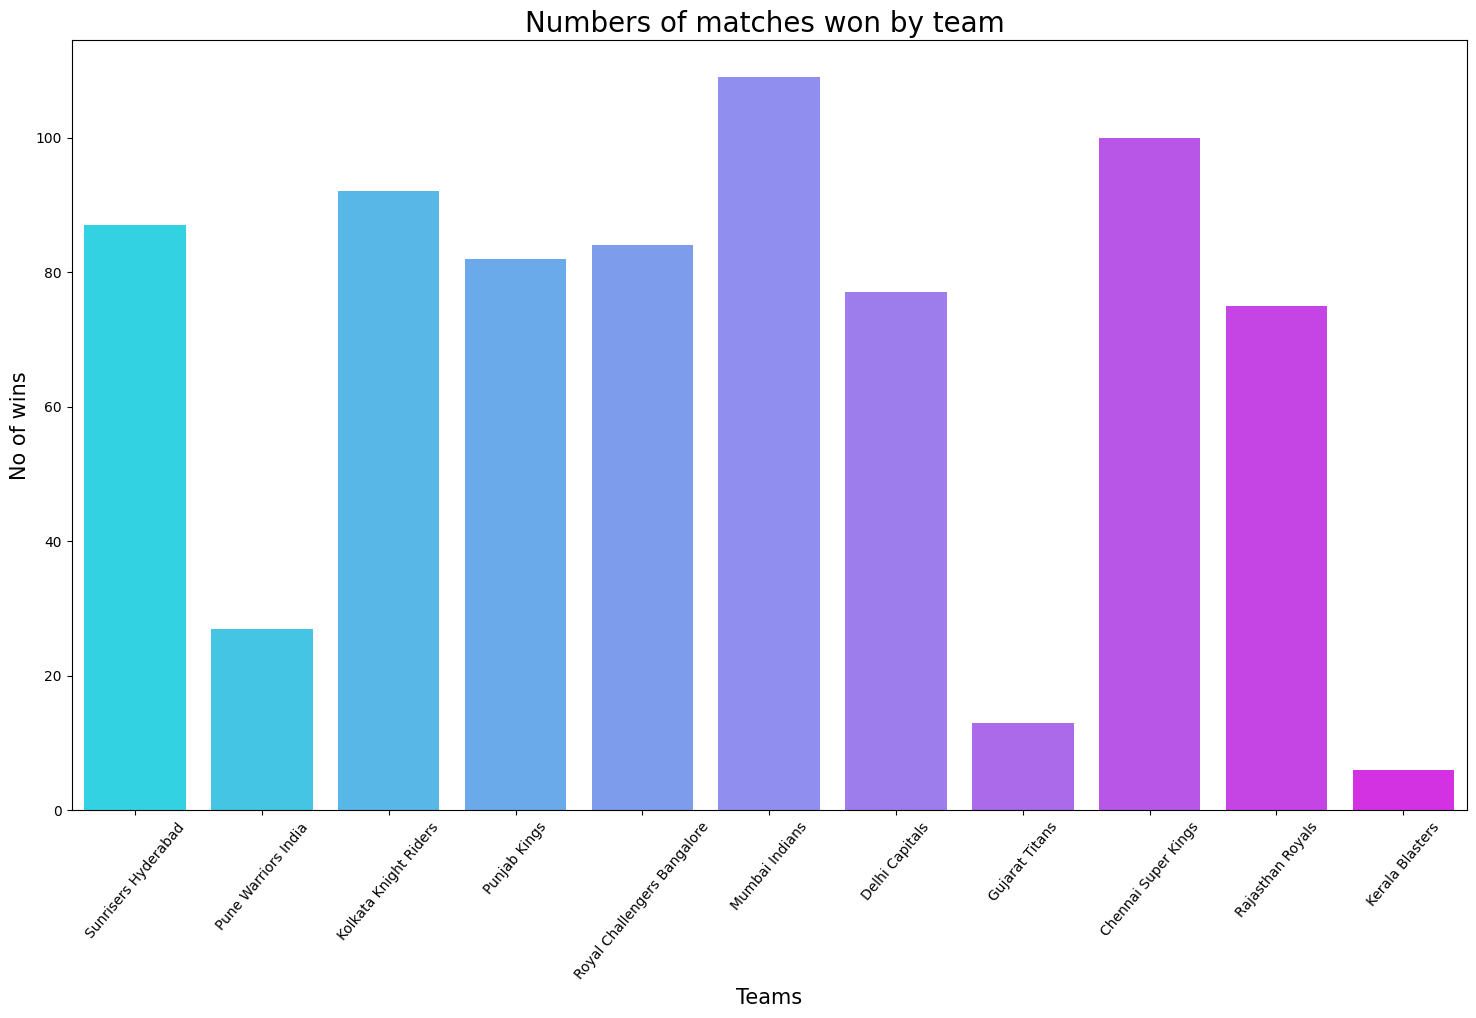

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=data, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

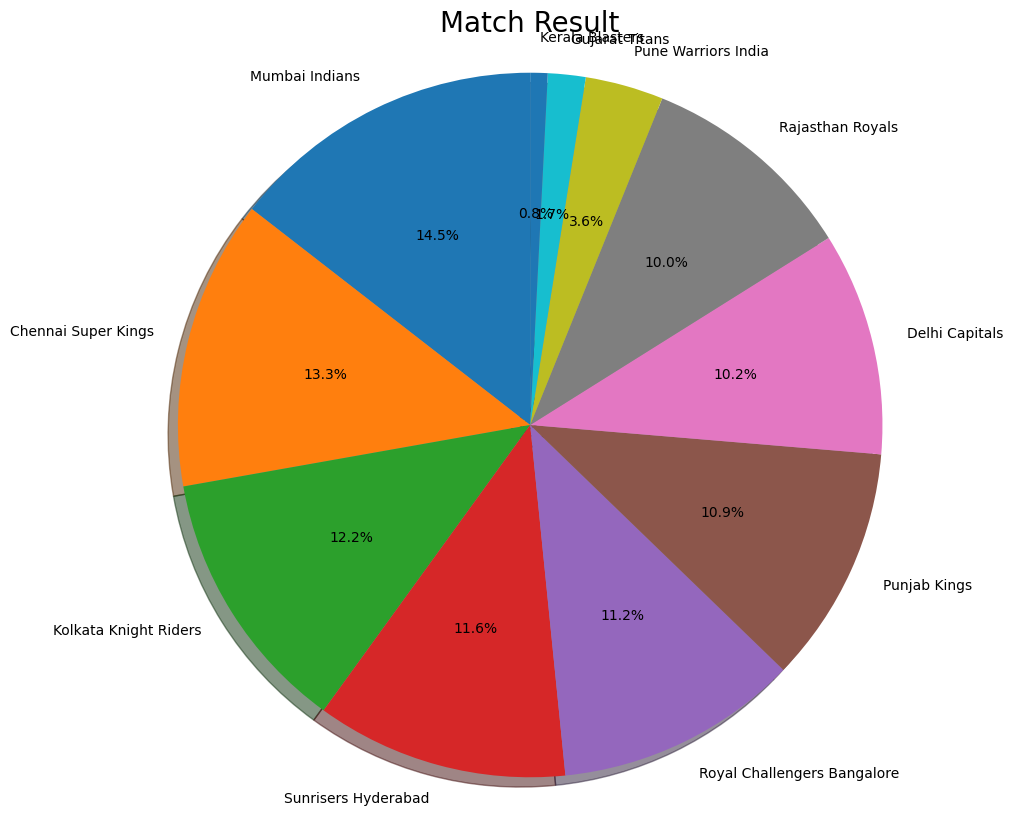

In [ ]:
Win=data.winner.value_counts()
labels=np.array(Win.index)
sizes = Win.values
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

In [ ]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
from plotly.graph_objects import Figure, Violin

# Create the plot
fig = Figure()

# Add violin traces for win_by_runs and win_by_wickets
fig.add_trace(Violin(
    x=data['team1'],
    y=data['win_by_runs'],
    name="Win by Runs",
    legendgroup="Win Margin",
    line_color="blue",
    fillcolor="lightblue"
))
# Customize the plot
fig.update_layout(
    title="Win Margin by Team",
    xaxis_title="Team",
    yaxis_title="Win Margin",
    violinmode="overlay"
)

# Show the plot
fig.show()


In [ ]:
# Create a dictionary to store player awards per year
player_awards_per_year = {}

# Loop through each match
for index, row in data.iterrows():
    season = row["season"]
    player = row["player_of_match"]

    # Initialize the count for the player in the current year if not existing
    if season not in player_awards_per_year:
        player_awards_per_year[season] = {}

    # Add or update the player's award count for the current year
    if player in player_awards_per_year[season]:
        player_awards_per_year[season][player] += 1
    else:
        player_awards_per_year[season][player] = 1

# Find the player with the most awards for each year
for year, player_awards in player_awards_per_year.items():
    most_awarded_player, max_awards = max(player_awards.items(), key=lambda item: item[1])
    print(f"Year {year}: {most_awarded_player} with {max_awards} awards")


Year 2017: BA Stokes with 3 awards
Year 2008: SE Marsh with 5 awards
Year 2009: YK Pathan with 3 awards
Year 2010: SR Tendulkar with 4 awards
Year 2011: CH Gayle with 6 awards
Year 2012: CH Gayle with 5 awards
Year 2013: MEK Hussey with 5 awards
Year 2014: GJ Maxwell with 4 awards
Year 2015: DA Warner with 4 awards
Year 2016: V Kohli with 5 awards
Year 2018: Rashid Khan with 4 awards
Year 2019: AD Russell with 4 awards


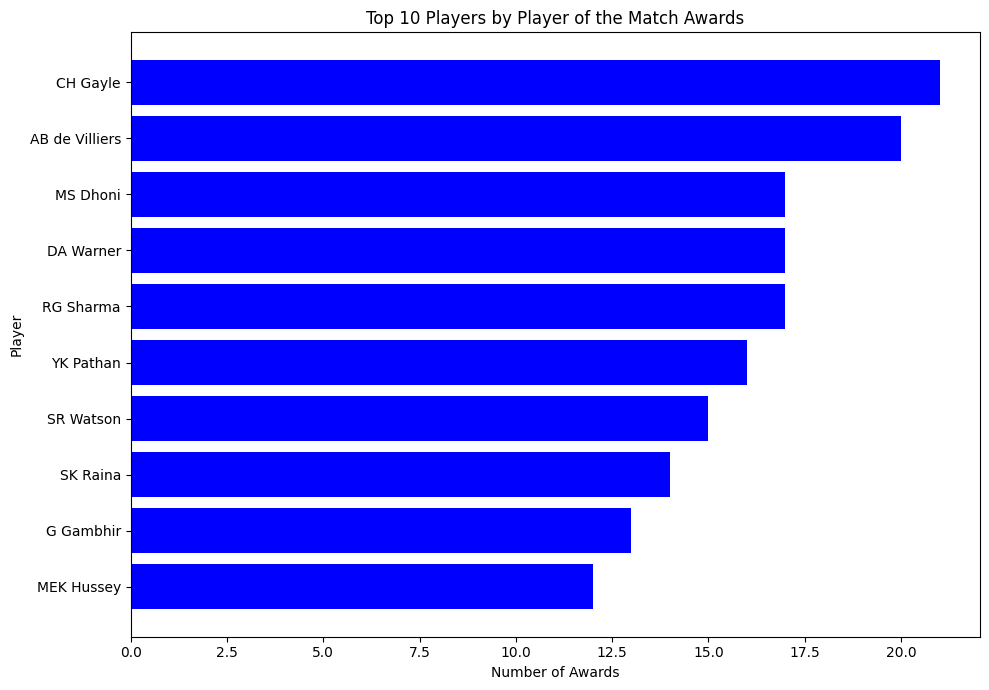

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Group data by player_of_match
grouped_data = data.groupby('player_of_match')

# Count the number of awards for each player
player_awards = grouped_data.size()

# Sort players by their awards in descending order
top_players = player_awards.sort_values(ascending=False)[:10]

# Extract player names and award counts for the top 10
player_names = top_players.index.tolist()
award_counts = top_players.values.tolist()

# Create the plot
plt.figure(figsize=(10, 7))
plt.barh(player_names, award_counts, color='blue')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.title('Top 10 Players by Player of the Match Awards')

# Show the plot
plt.gca().invert_yaxis()  # Invert axis to display the player with most awards at the top
plt.tight_layout()
plt.show()


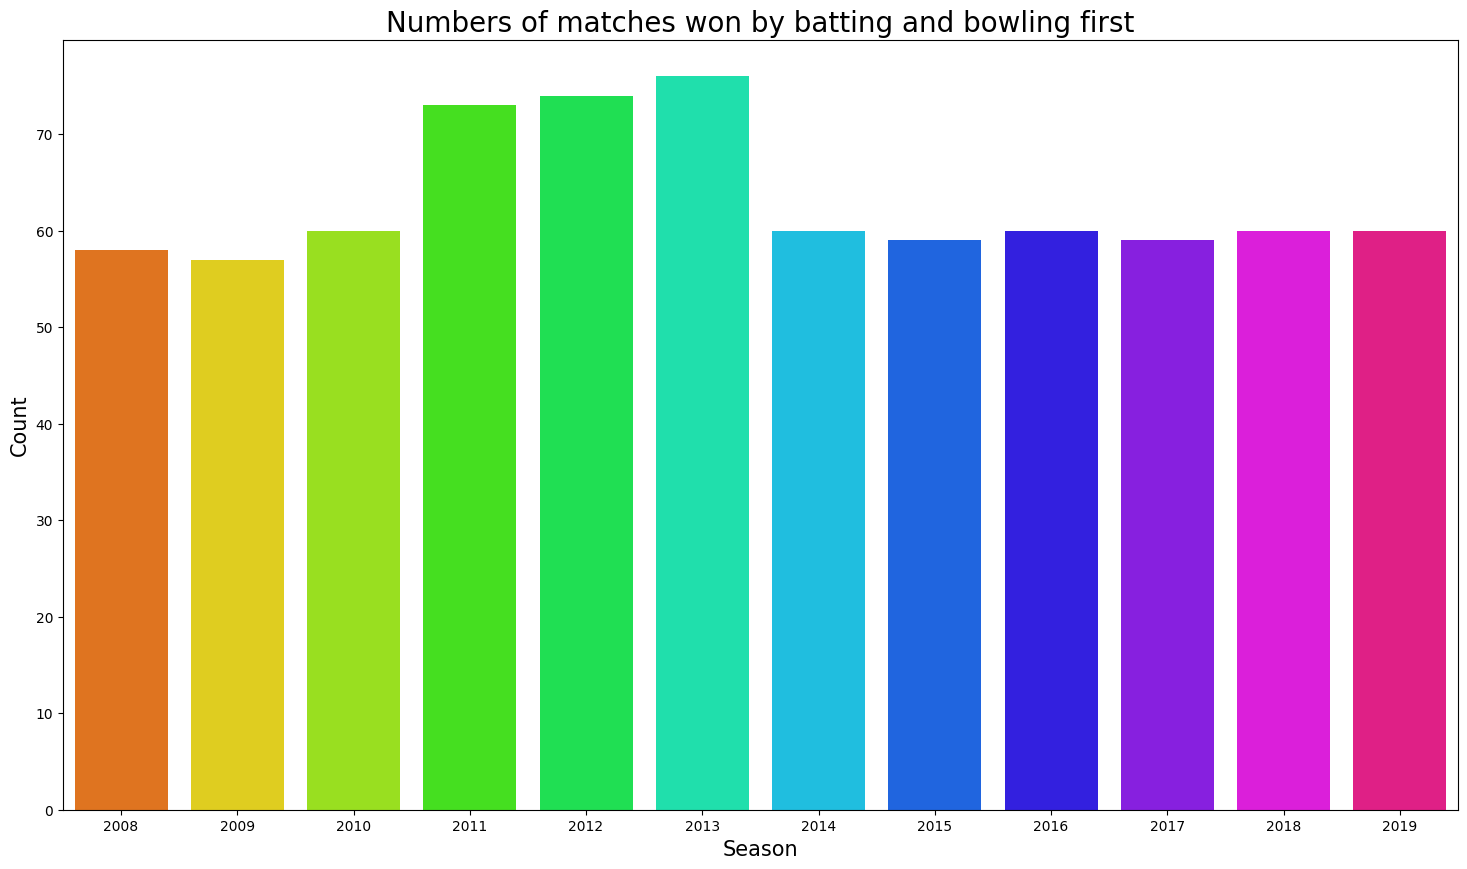

In [ ]:
plt.figure(figsize=(18, 10))
sns.countplot(x="season", data=data, palette="hsv")
plt.title("Numbers of matches won by batting and bowling first", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


In [ ]:
data['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [ ]:
toss=data['toss_winner'].value_counts()
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar( y=toss,x=toss.index,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="No. of tosses won by each team",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)

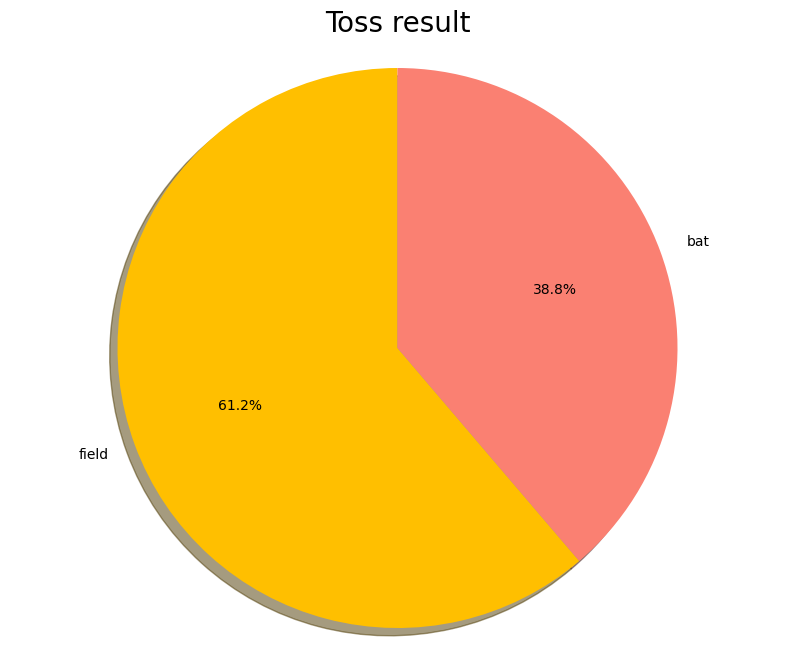

In [ ]:
# we will plot pie chart on Toss decision
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

In [ ]:
fig=px.histogram(data_frame=data,x='season',color='toss_decision',color_discrete_sequence=colors,barmode='group')
fig.update_layout(title="Toss decision in different seasons",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1)
fig.show()

In [ ]:
data.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

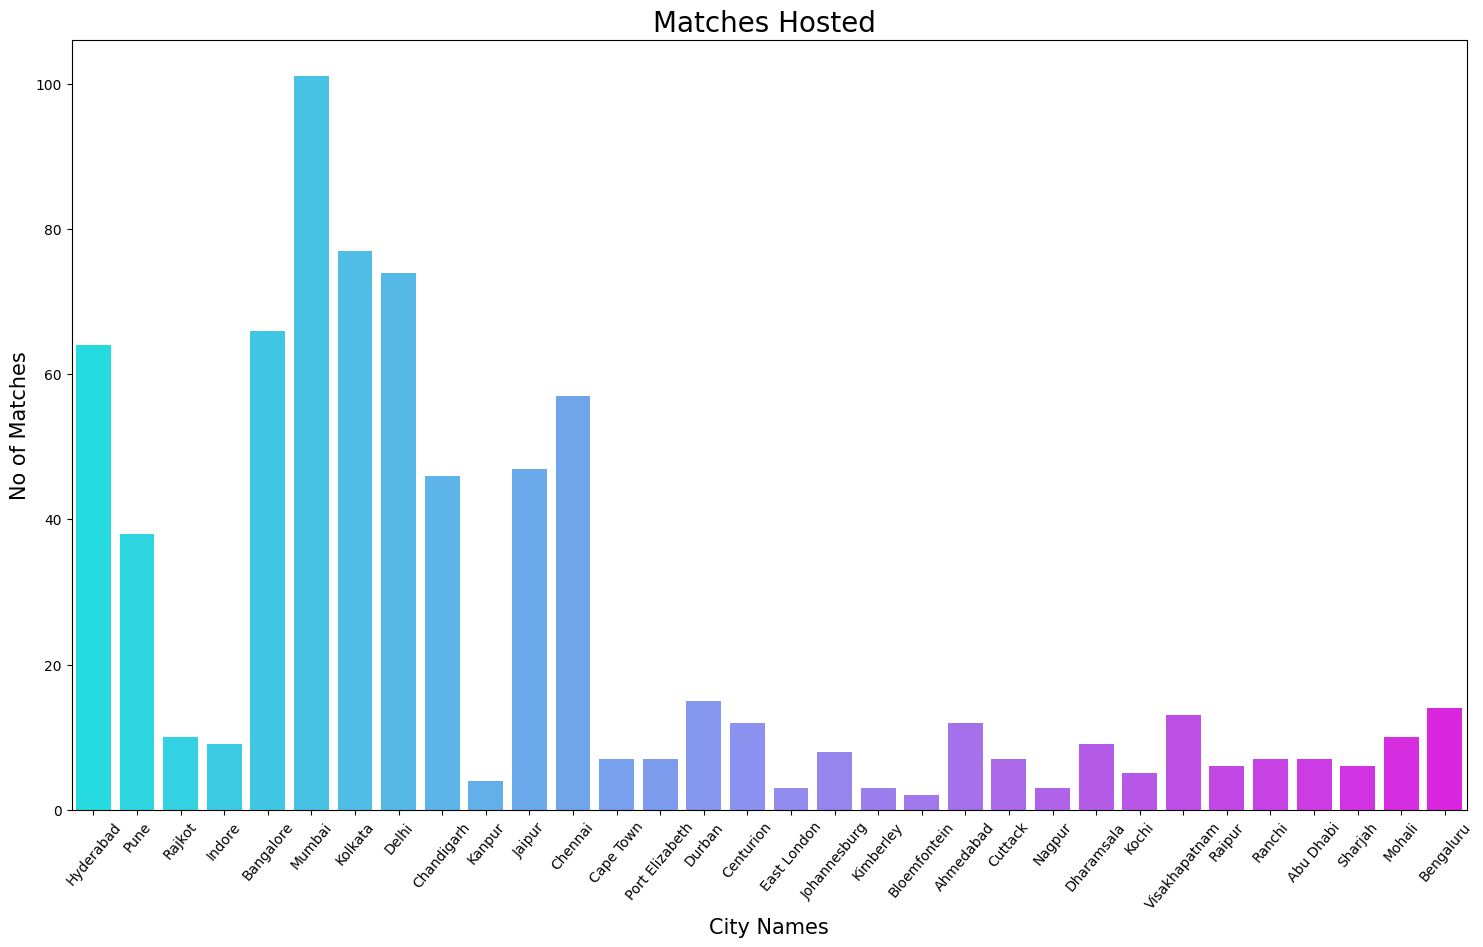

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(x='city',data=data, palette='cool')
plt.title("Matches Hosted ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("City Names",fontsize=15)
plt.ylabel("No of Matches",fontsize=15)
plt.show()

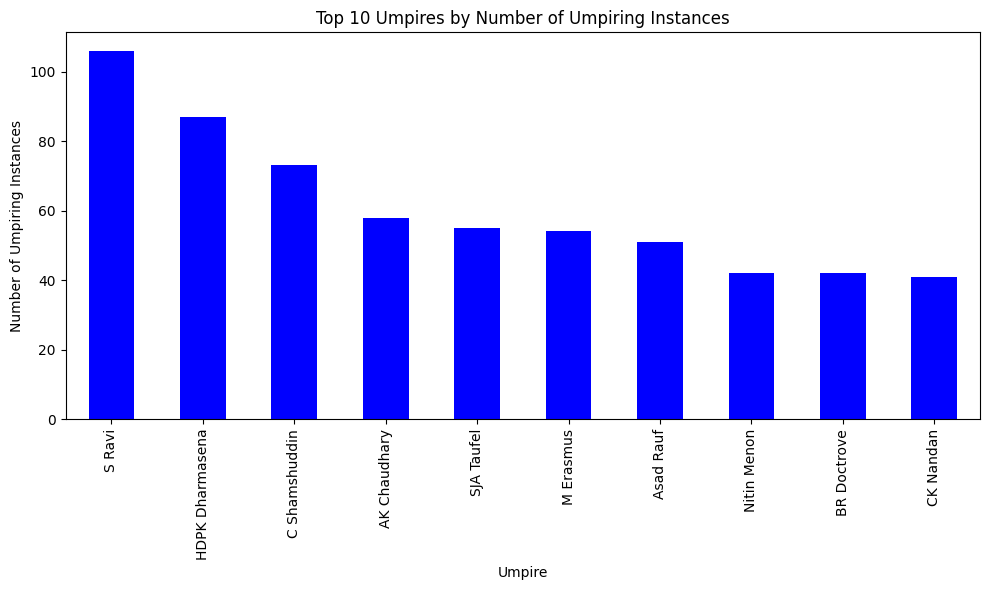

In [ ]:


umpires = pd.concat([data["umpire1"], data["umpire2"]]).value_counts()

# Filter top 10 umpires
top_umpires = umpires.head(10)

# Create the plot
plt.figure(figsize=(10, 6))
top_umpires.plot(kind="bar", color="blue")
plt.xlabel("Umpire")
plt.ylabel("Number of Umpiring Instances")
plt.title(f"Top 10 Umpires by Number of Umpiring Instances")
plt.tight_layout()
plt.show()


In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune Warriors India,Rising Pune Supergiant,field,normal,0,Pune Warriors India,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Pune Warriors India,Punjab Kings,Kings XI Punjab,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
deliveries = pd.read_csv("/content/deliveries.csv")
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:

deliveries =deliveries.rename(columns={'match_id': 'id'})
deliveries.columns


Index(['id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
season_data = data[['id', 'season']].merge(deliveries, left_on='id', right_on='id', how='left')


In [ ]:
season=season_data.groupby(['season'])['total_runs'].sum().reset_index()
p=season.set_index('season')
fig = px.line(p, x=p.index, y="total_runs")
fig.update_layout(title="Total Runs Across the Seasons ",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In [ ]:
match_per_season=data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [ ]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('season',inplace=True)
runs_per_season.style.background_gradient(cmap='PuBu',subset=['Runs scored per match'])

,matches,total_runs,Runs scored per match
season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


In [ ]:
fig = px.line(runs_per_season, x=runs_per_season.index, y="Runs scored per match")
fig.update_layout(title="Runs scored per match across seasons",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In [ ]:
winning_teams =data[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]

winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

In [ ]:
winners_of_IPL.value_counts().index

MultiIndex([(       'Mumbai Indians',),
            (  'Chennai Super Kings',),
            ('Kolkata Knight Riders',),
            (  'Sunrisers Hyderabad',),
            (     'Rajasthan Royals',)],
           names=['team'])

In [ ]:
colors = ['turquoise',] * 6
colors[0] = 'crimson'
fig=px.bar( y=winners_of_IPL['team'].value_counts(),x=winners_of_IPL['team'].value_counts().index,labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Winners of IPL",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
matches_played_byteams=pd.concat([data['team1'],data['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Team Name,Total Matches played
0,Mumbai Indians,187
1,Sunrisers Hyderabad,183
2,Royal Challengers Bangalore,180
3,Kolkata Knight Riders,178
4,Delhi Capitals,177
5,Punjab Kings,176
6,Chennai Super Kings,164
7,Rajasthan Royals,147
8,Pune Warriors India,76
9,Gujarat Titans,30


In [ ]:
wins=pd.DataFrame(data['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Sunrisers Hyderabad,87
4,Royal Challengers Bangalore,84
5,Punjab Kings,82
6,Delhi Capitals,77
7,Rajasthan Royals,75
8,Pune Warriors India,27
9,Gujarat Titans,13


In [ ]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu',subset=['% Win'])

,Team Name,Total Matches played,Wins,% Win
0,Chennai Super Kings,164,100,60.975610
1,Mumbai Indians,187,109,58.288770
2,Kolkata Knight Riders,178,92,51.685393
3,Rajasthan Royals,147,75,51.020408
4,Sunrisers Hyderabad,183,87,47.540984
5,Royal Challengers Bangalore,180,84,46.666667
6,Punjab Kings,176,82,46.590909
7,Delhi Capitals,177,77,43.502825
8,Gujarat Titans,30,13,43.333333
9,Kerala Blasters,14,6,42.857143


In [ ]:
colors = ['turquoise',] * 15
colors[-4] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['% Win'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win % by teams",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:
def lucky(match_data,team_name):
    return match_data[match_data['winner']==team_name]['venue'].value_counts().nlargest(10)


In [ ]:
mi=lucky(data,'Mumbai Indians')
values = mi
labels=mi.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for MI:",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
rcb=lucky(data,'Royal Challengers Bangalore')
values = rcb
labels=rcb.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for RCB:",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:

csk=lucky(data,'Chennai Super Kings')
values = csk
labels=csk.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for CSK:",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
def comparison(team1,team2):
    compare=data[((data['team1']==team1)|(data['team2']==team1))&((data['team1']==team2)|(data['team2']==team2))]
    fig=px.histogram(data_frame=compare,x='season',color='winner',labels=dict(x="Team Name",y="Count"),barmode='group',nbins=16,color_discrete_sequence=colors,)
    fig.update_layout(title="Team Comparision:",
                      titlefont={'size': 26},template='simple_white'
                      )
    fig.update_traces(marker_line_color='black',
                      marker_line_width=2.5, opacity=1)
    fig.show()
comparison('Mumbai Indians','Chennai Super Kings')

In [ ]:
filt=(deliveries['batsman']=='V Kohli')
df_kohli=deliveries[filt]
df_kohli.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:

values = df_kohli['dismissal_kind'].value_counts()
labels=df_kohli['dismissal_kind'].value_counts().index
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Dismissal Type",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
df_kohli['total_runs'].sum()

5616

In [ ]:

def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [ ]:
print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

Runs scored from 1's : 1741
Runs scored from 2's : 586
Runs scored from 3's : 33
Runs scored from 4's : 1928
Runs scored from 6's : 1146


In [ ]:

values=[1919,692,39,2016,1212]
labels=[1,2,3,4,6]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Virat Kohli total runs contribution",
                  titlefont={'size': 30},
                  )
fig.show()

In [ ]:
runs=deliveries.groupby(['id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('id',axis=1,inplace=True)
runs.head()

,inning,batting_team,total_runs
0,1,Sunrisers Hyderabad,207
1,2,Royal Challengers Bangalore,172
2,1,Mumbai Indians,184
3,2,Rising Pune Supergiant,187
4,1,Gujarat Lions,183


In [ ]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

In [ ]:
fig = px.box(y='total_runs',x='batting_team',data_frame=inning1,color='batting_team')

fig.update_layout(title="Batting First",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In [ ]:

fig = px.box(y='total_runs',x='batting_team',data_frame=inning2,color='batting_team')

fig.update_layout(title="Batting Second",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In [ ]:
high_scores=deliveries.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
score_200=high_scores[high_scores['total_runs']>=200]
score_200.head(5)

,id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
16,9,1,Delhi Daredevils,Rising Pune Supergiant,205
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213
62,32,1,Sunrisers Hyderabad,Kings XI Punjab,207
72,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209


In [ ]:
x1=score_200['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,batting_team
Royal Challengers Bangalore,19
Chennai Super Kings,17
Kings XI Punjab,15
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,10
Rajasthan Royals,8
Delhi Daredevils,7
Gujarat Lions,1
Deccan Chargers,1


In [ ]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=x1.index,y=x1['batting_team'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total count of 200+ by batting team",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [ ]:

balls_played=deliveries.groupby(['batsman'])['ball'].count().reset_index()
balls_played.sort_values(by='ball',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,batsman,ball
486,V Kohli,4211
428,SK Raina,4044
367,RG Sharma,3816
392,S Dhawan,3776
147,G Gambhir,3524
384,RV Uthappa,3492
112,DA Warner,3398
290,MS Dhoni,3318
42,AM Rahane,3215
92,CH Gayle,3131


In [ ]:

runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style.background_gradient(cmap='PuBu')

,Batsman,runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [ ]:
fig = px.scatter(x=y['runs'], y=y['Batsman'], size=y['runs'])
fig.update_layout(title="Scatter Plot of Runs Scored by Top Players",
                  titlefont={'size': 26},
                  template='simple_white')
fig.show()


In [ ]:

balls_played=balls_played.merge(runs,left_on='batsman',right_on='Batsman',how='outer')
four=deliveries[deliveries['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,4s
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


In [ ]:
six=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


In [ ]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ball']*100
player['4s'].fillna(0,inplace=True)
player.isnull().values.any()

False

In [ ]:
player.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
67,B Stanlake,5,2,7.0,0,250.000000
485,Umar Gul,39,19,0.0,5,205.263158
381,RS Sodhi,4,2,9.0,0,200.000000
407,S Sharma,8,4,5.0,0,200.000000
34,AD Russell,1445,803,24.0,119,179.950187
456,Shahid Afridi,81,46,0.0,6,176.086957
169,I Malhotra,7,4,10.0,0,175.000000
391,S Curran,95,55,2.0,3,172.727273
209,K Gowtham,148,86,2.0,10,172.093023
437,SN Thakur,36,21,0.0,1,171.428571


In [ ]:
sr=player[player.ball > 100]
sr.sort_values(by='runs',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
486,V Kohli,5434,4211,0.0,191,129.042983
428,SK Raina,5415,4044,0.0,195,133.902077
367,RG Sharma,4914,3816,30.0,194,128.773585
112,DA Warner,4741,3398,1.0,181,139.523249
392,S Dhawan,4632,3776,1.0,96,122.669492
92,CH Gayle,4560,3131,35.0,327,145.640370
290,MS Dhoni,4477,3318,137.0,207,134.930681
384,RV Uthappa,4446,3492,14.0,156,127.319588
26,AB de Villiers,4428,2977,5.0,214,148.740343
147,G Gambhir,4223,3524,39.0,59,119.835414


In [ ]:
deliveries['dismissal_kind'].unique()
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
hwt=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
bo=hwt['bowler'].value_counts()

In [ ]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=bo[:10].index,y=bo[:10],labels=dict(x="Bowler",y="Total Wickets"),)
fig.update_layout(title="Leading wicket-takers",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()